# Import data

In [1]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import numpy as np

In [9]:
data_immo = pd.read_csv("immo.csv")
data_immo

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_number
0,0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,1
1,1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,0
2,2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,1
3,3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,0
4,4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,1
...,...,...,...,...,...,...,...,...,...,...,...
15409,16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,1
15410,16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,3
15411,16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,1
15412,16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,0


In [10]:
data_immo_with_imputation = pd.read_csv("immo_with_imput.csv")

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_number
0,0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,1
1,1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,0
2,2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,1
3,3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,0
4,4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,1
...,...,...,...,...,...,...,...,...,...,...,...
15409,16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,1
15410,16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,3
15411,16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,1
15412,16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,0


In [4]:
columns = list(data_immo.drop(['Unnamed: 0','longitude','latitude'],axis = 1).columns)

In [5]:
columns_with = list(data_immo_with_imputation.drop(['Unnamed: 0','longitude','latitude'],axis = 1).columns)

In [6]:
from scipy.stats import pearsonr
# On pose les hypothèses de départ :

# H0 : Variables indépendantes si p-value > 5% H1 : Variables non indépendantes si p-value < 5%

# La première sortie correspond au coefficient de corrélation, la seconde à la p-value (ou probabilité critique)
for i in columns:
    test_personr = pearsonr(data_immo[i], data_immo['median_income'])
    print(test_personr)
# PearsonRResult(statistic=-0.08298589139832141, pvalue=1.278310306953696e-14)
# H0 : Variables indépendantes si p-value > 5%
# H1 : Variables non indépendantes si p-value < 5%

(-0.20208410793520576, 9.148243212284339e-142)
(0.22124965651676992, 3.109038660095096e-170)
(0.02507209558776385, 0.001851859501267346)
(0.04420360835518704, 4.013543192974291e-08)
(0.04956829672108344, 7.397454949379436e-10)
(0.9999999999999998, 0.0)
(0.640404475147838, 0.0)
(-0.06582722402710177, 2.818091577017698e-16)


<AxesSubplot:>

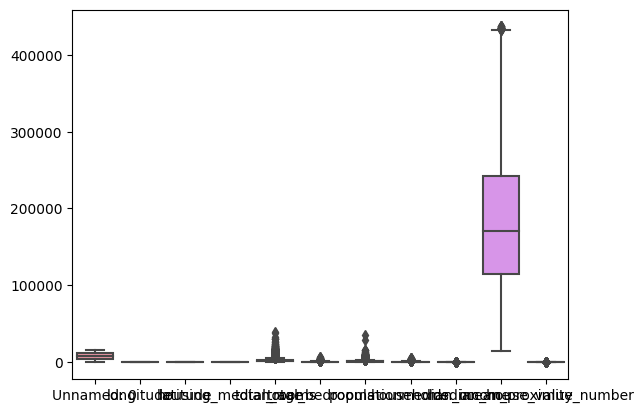

In [7]:
sns.boxplot(data=data_immo)